# German Bank 

* **Classe :** 4DS2
* **Membres de l'équipe :**
* Ben Mhanna Koussay
* Ben Nacer Chayma
* Douik Mohamed Malek
* Ayachi Hosni
* Hethli Amal 
* Kitar Chifa



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#lECTURE DU FICHIER ET ATTRIBUTION DES NOMS DE COLONNES 
file = pd.read_csv("german.data" , header=None, sep=" ")
file.columns=['ExistingChecking', 'Duration', 'History', 'Purpose',
       'Amount', 'Savings', 'EmploymentSince', 'InstallmentRate',
       'StatusSex', 'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
       'OtherInstallmentPlans', 'Housing', 'ExistingCredits', 'Job',
       'PeopleLiable', 'Telephone', 'ForeignWorker', 'Class']

In [ ]:
file.head()


In [ ]:
classes = file["Class"].value_counts()
df = pd.DataFrame({'Classes': classes.index,'values': classes.values})
plt.figure(figsize = (6,6))
plt.title('Classes')
sns.set_color_codes("pastel")
sns.barplot(x="Classes", y="values", data=df)
locs, labels = plt.xticks()
plt.show()

#### => Le désequilibre entre les deux clasees de crédits n'est pas très large , donc on peut garder ces valeurs 

In [ ]:
file.info()

In [379]:
# Affichage de la liste des colonnes :
file.columns

Index(['ExistingChecking', 'Duration', 'History', 'Purpose', 'Amount',
       'Savings', 'EmploymentSince', 'InstallmentRate', 'StatusSex',
       'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
       'OtherInstallmentPlans', 'Housing', 'ExistingCredits', 'Job',
       'PeopleLiable', 'Telephone', 'ForeignWorker', 'Class'],
      dtype='object')

In [380]:
#nettoyage des donnees 
file.isna().sum()

ExistingChecking         0
Duration                 0
History                  0
Purpose                  0
Amount                   0
Savings                  0
EmploymentSince          0
InstallmentRate          0
StatusSex                0
OtherDebtors             0
ResidenceSince           0
Property                 0
Age                      0
OtherInstallmentPlans    0
Housing                  0
ExistingCredits          0
Job                      0
PeopleLiable             0
Telephone                0
ForeignWorker            0
Class                    0
dtype: int64

* Nous pouvons remarquer qu'il n'y a **pas** de lignes manquantes (Valeurs "na") pour les colonnes que nous avons sélectionnées.

In [381]:
# Affichage des types des variables
file.dtypes

ExistingChecking         object
Duration                  int64
History                  object
Purpose                  object
Amount                    int64
Savings                  object
EmploymentSince          object
InstallmentRate           int64
StatusSex                object
OtherDebtors             object
ResidenceSince            int64
Property                 object
Age                       int64
OtherInstallmentPlans    object
Housing                  object
ExistingCredits           int64
Job                      object
PeopleLiable              int64
Telephone                object
ForeignWorker            object
Class                     int64
dtype: object

In [ ]:
# VERIFICATION ES VALEURS NULLES

In [382]:
file[file["Age"] == 0]

,ExistingChecking,Duration,History,Purpose,Amount,Savings,EmploymentSince,InstallmentRate,StatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,PeopleLiable,Telephone,ForeignWorker,Class


In [383]:
file[file["Duration"] == 0]

,ExistingChecking,Duration,History,Purpose,Amount,Savings,EmploymentSince,InstallmentRate,StatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,PeopleLiable,Telephone,ForeignWorker,Class


In [384]:
file[file["Amount"] == 0]

,ExistingChecking,Duration,History,Purpose,Amount,Savings,EmploymentSince,InstallmentRate,StatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,PeopleLiable,Telephone,ForeignWorker,Class


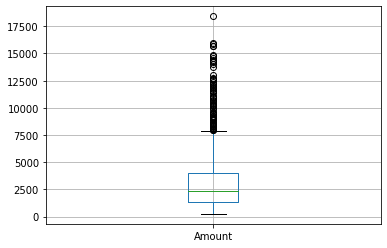

In [385]:
#Vérification des valeurs abérantes
file.boxplot(column="Amount")

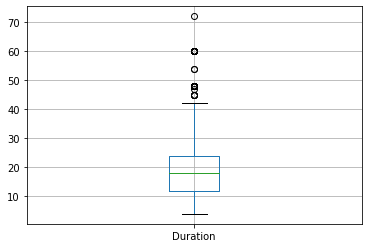

In [386]:
file.boxplot(column="Duration")

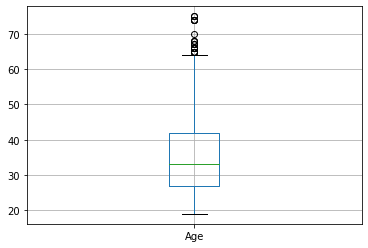

In [387]:
file.boxplot(column="Age")

In [388]:
# Description des colonnes (médiane et moyenne)
file.describe()

,Duration,Amount,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [389]:
((file.mean() - file.median()) / file.mean()).abs()

Duration           0.138880
Amount             0.290946
InstallmentRate    0.009082
ResidenceSince     0.054482
Age                0.071625
ExistingCredits    0.289268
PeopleLiable       0.134199
Class              0.230769
dtype: float64

## Data Processing 

In [390]:
# Class transformation 
file.Class.replace([1,2], [1,0], inplace=True)

In [391]:
file.head()

,ExistingChecking,Duration,History,Purpose,Amount,Savings,EmploymentSince,InstallmentRate,StatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,PeopleLiable,Telephone,ForeignWorker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


### Rescaling avec la valeur moyenne et l'ecart-type (Standard Scaler) 

In [392]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

In [393]:
quanti = file[['Amount', 'Duration', 'InstallmentRate', 'ResidenceSince', 'Age', 
           'ExistingCredits', 'PeopleLiable', 'Class']]

In [394]:
#matrice_cr= ss.fit_transform(quanti)
quanti.head()

,Amount,Duration,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable,Class
0,1169,6,4,4,67,2,1,1
1,5951,48,2,2,22,1,1,0
2,2096,12,2,3,49,1,2,1
3,7882,42,2,4,45,1,2,1
4,4870,24,3,4,53,2,2,0


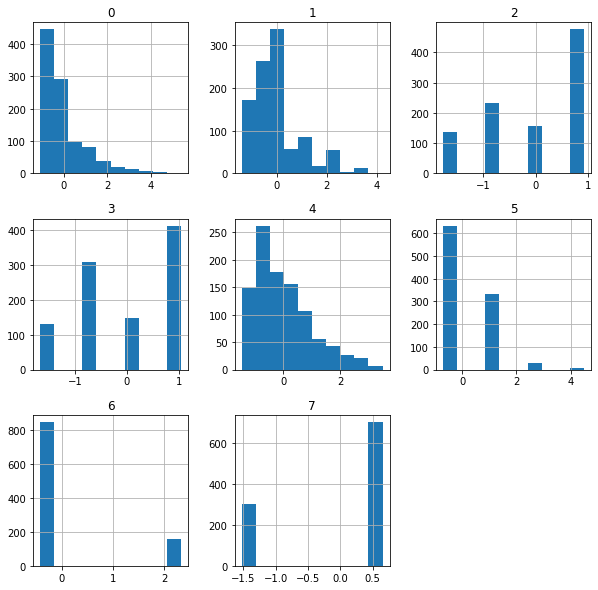

In [395]:
pd.DataFrame(matrice_cr).hist(figsize=(10,10));

### Rescaling avec la mediane et le quartile Q1 (Robust Scaler ) 

In [396]:
from sklearn.preprocessing import RobustScaler 
rs = RobustScaler()

In [397]:
matrice_mediane= rs.fit_transform(quanti.values)

In [398]:
quanti.head()

,Amount,Duration,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable,Class
0,1169,6,4,4,67,2,1,1
1,5951,48,2,2,22,1,1,0
2,2096,12,2,3,49,1,2,1
3,7882,42,2,4,45,1,2,1
4,4870,24,3,4,53,2,2,0


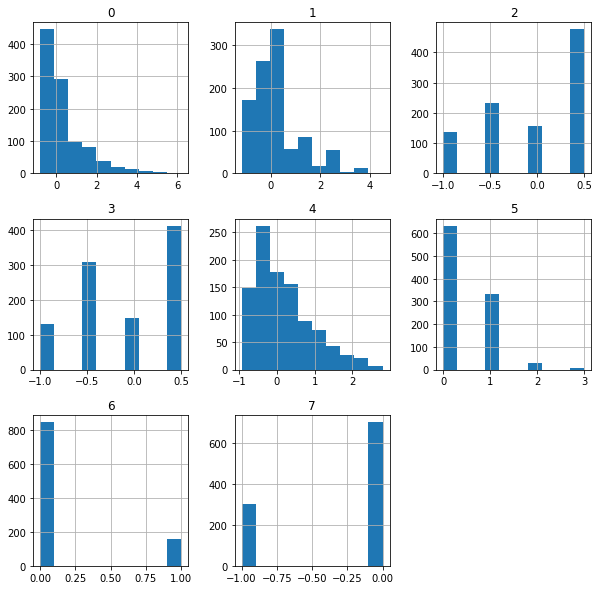

In [399]:
pd.DataFrame(matrice_mediane).hist(figsize=(10,10));

### Encodage des variables qualitatives 

#### Label encoder pour les variables à deux modalités 

In [401]:
tel = file[["Telephone"]]

In [402]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

In [403]:
telephone=label_encoder.fit_transform(tel.values) #appliquer LabelEncoder 

C:\Users\chaym\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [404]:
foreign= label_encoder.fit_transform(file["ForeignWorker"].values)

#### One hot encoder pour les variables à plusieurs modalités 

In [406]:
from sklearn.preprocessing import OneHotEncoder
onehot= OneHotEncoder()

In [407]:
data= file[["ExistingChecking","History","Purpose","Savings","EmploymentSince","StatusSex","OtherDebtors",
           "Property","OtherInstallmentPlans","Housing","Job"]]

In [408]:
existingChecking;

In [409]:
dat= file[["ExistingChecking","History","Purpose","Savings","EmploymentSince","StatusSex","OtherDebtors",
           "Property","OtherInstallmentPlans","Housing","Job","Telephone","ForeignWorker"]]

In [410]:
dummyvars = pd.get_dummies(dat)

In [411]:
dummyvars;

In [412]:
#existingChecking = pd.DataFrame(onehot.fit_transform(data["ExistingChecking"].values.reshape(-1,1)))

In [413]:
#History= pd.DataFrame(onehot.fit_transform(data["History"].values.reshape(-1,1)))

In [414]:
#Purpose= pd.DataFrame(onehot.fit_transform(data["Purpose"].values.reshape(-1,1)))

In [415]:
#Savings= pd.DataFrame(onehot.fit_transform(data["Savings"].values.reshape(-1,1)))

In [416]:
#EmploymentSince = pd.DataFrame(onehot.fit_transform(data["EmploymentSince"].values.reshape(-1,1)))

In [417]:
#StatusSex = pd.DataFrame(onehot.fit_transform(data["StatusSex"].values.reshape(-1,1)))

In [418]:
#OtherDebtors = pd.DataFrame(onehot.fit_transform(data["OtherDebtors"].values.reshape(-1,1)))

In [419]:
#Property = pd.DataFrame(onehot.fit_transform(data["Property"].values.reshape(-1,1)))

In [420]:
#OtherInstallmentPlans = pd.DataFrame(onehot.fit_transform(data["OtherInstallmentPlans"].values.reshape(-1,1)))

In [421]:
#Job = pd.DataFrame(onehot.fit_transform(data["Job"].values.reshape(-1,1)))

In [422]:
existingChecking= pd.DataFrame(pd.factorize(data["ExistingChecking"])[0])

In [423]:
Housing = pd.DataFrame(pd.factorize(data["Housing"])[0])

In [424]:
History=  pd.DataFrame(pd.factorize(data["History"])[0])

In [425]:
Purpose= pd.DataFrame(pd.factorize(data["Purpose"])[0])

In [426]:
Savings= pd.DataFrame(pd.factorize(data["Savings"])[0])

In [427]:
EmploymentSince=pd.DataFrame(pd.factorize(data["EmploymentSince"])[0])

In [428]:
StatusSex = pd.DataFrame(pd.factorize(data["StatusSex"])[0])

In [429]:
OtherDebtors = pd.DataFrame(pd.factorize(data["OtherDebtors"])[0])

In [430]:
Property  = pd.DataFrame(pd.factorize(data["Property"])[0])

In [431]:
OtherInstallmentPlans  = pd.DataFrame(pd.factorize(data["OtherInstallmentPlans"])[0])

In [432]:
Job   = pd.DataFrame(pd.factorize(data["Job"])[0])

In [433]:
quali = pd.concat([existingChecking, History,Purpose,Savings,EmploymentSince,StatusSex,OtherDebtors,Property,OtherInstallmentPlans,Housing,Job], axis = 1)

In [434]:
quali.head()

,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,0,0,0,0,0
2,2,0,1,1,2,0,0,0,0,0,1
3,0,1,2,1,2,0,1,1,0,1,0
4,0,2,3,1,1,0,0,2,0,1,0


In [435]:
# Concatenation des variables qualitatives 
quali = pd.concat([quali,pd.DataFrame(telephone),pd.DataFrame(foreign)], axis = 1)

In [436]:
quali.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,1,1,1,0,0,0,0,0,0,0
2,2,0,1,1,2,0,0,0,0,0,1,0,0
3,0,1,2,1,2,0,1,1,0,1,0,0,0
4,0,2,3,1,1,0,0,2,0,1,0,0,0


In [437]:
# Attribution des noms aux colonnes 
quali.columns=["ExistingChecking","History","Purpose","Savings","EmploymentSince","StatusSex","OtherDebtors",
           "Property","OtherInstallmentPlans","Housing","Job",'Telephone', 'ForeignWorker']

In [438]:
# Concatenation des variables qualitatives et quantitaves 
final_data=pd.concat([quali,quanti], axis = 1)

In [439]:
final_data.head()

,ExistingChecking,History,Purpose,Savings,EmploymentSince,StatusSex,OtherDebtors,Property,OtherInstallmentPlans,Housing,...,Telephone,ForeignWorker,Amount,Duration,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable,Class
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1169,6,4,4,67,2,1,1
1,1,1,0,1,1,1,0,0,0,0,...,0,0,5951,48,2,2,22,1,1,0
2,2,0,1,1,2,0,0,0,0,0,...,0,0,2096,12,2,3,49,1,2,1
3,0,1,2,1,2,0,1,1,0,1,...,0,0,7882,42,2,4,45,1,2,1
4,0,2,3,1,1,0,0,2,0,1,...,0,0,4870,24,3,4,53,2,2,0


### ACP

In [454]:
germanACP=final_data.drop(columns="Class")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(germanACP)
germanACP.head()

,ExistingChecking,History,Purpose,Savings,EmploymentSince,StatusSex,OtherDebtors,Property,OtherInstallmentPlans,Housing,Job,Telephone,ForeignWorker,Amount,Duration,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1169,6,4,4,67,2,1
1,1,1,0,1,1,1,0,0,0,0,0,0,0,5951,48,2,2,22,1,1
2,2,0,1,1,2,0,0,0,0,0,1,0,0,2096,12,2,3,49,1,2
3,0,1,2,1,2,0,1,1,0,1,0,0,0,7882,42,2,4,45,1,2
4,0,2,3,1,1,0,0,2,0,1,0,0,0,4870,24,3,4,53,2,2


In [468]:
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#appliquer acp
coord = acp.fit_transform(Z)

In [469]:
#nombre de composantes calculées
print(acp.n_components_) #58

20


In [470]:
#variance expliquée
print(acp.explained_variance_)

[2.2358855  1.83183308 1.44084034 1.34130059 1.29580258 1.16835795
 1.10760911 1.00176596 0.97239957 0.91926096 0.88824134 0.83829022
 0.77263375 0.75876872 0.7396221  0.67691383 0.64002789 0.60739753
 0.5263455  0.25672349]


In [471]:
#valeur corrigée
n = final_data.shape[0]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.23364962 1.83000125 1.4393995  1.33995929 1.29450677 1.16718959
 1.10650151 1.0007642  0.97142717 0.9183417  0.8873531  0.83745193
 0.77186111 0.75800995 0.73888248 0.67623692 0.63938786 0.60679014
 0.52581916 0.25646676]


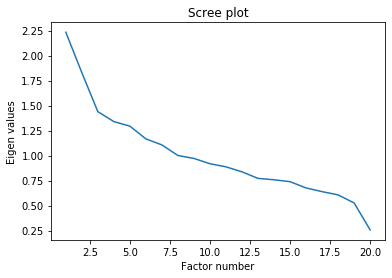

In [475]:
#scree plot
p=acp.n_components_
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

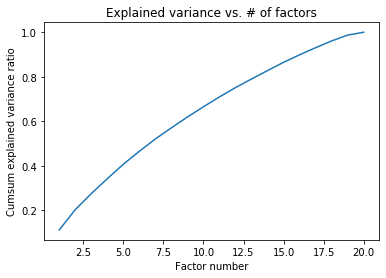

In [476]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [477]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval}))

    Val.Propre
0     2.233650
1     1.830001
2     1.439399
3     1.339959
4     1.294507
5     1.167190
6     1.106502
7     1.000764
8     0.971427
9     0.918342
10    0.887353
11    0.837452
12    0.771861
13    0.758010
14    0.738882
15    0.676237
16    0.639388
17    0.606790
18    0.525819
19    0.256467


 #### => Selon les résultas obtenus dans Scree plot, cumul de variance expliquée et les valeurs propres on a 8 dimensions PCA selon le critére de Kaiser (Eigenvalue > 1)

In [479]:
#contributions aux axes   
ctr = coord**2 
for j in range(p):    
    ctr[:,j] = ctr[:,j]/(n*eigval[j])     
print(pd.DataFrame({'id':germanACP.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})) 

      id         CTR_1     CTR_2
0      0  7.695666e-05  0.007439
1      1  5.043418e-07  0.001362
2      2  3.508232e-04  0.001591
3      3  1.420419e-03  0.000032
4      4  9.496537e-04  0.000994
5      5  3.304725e-03  0.000064
6      6  6.557739e-07  0.001406
7      7  3.172412e-03  0.000815
8      8  6.951509e-04  0.000351
9      9  4.349274e-07  0.000968
10    10  9.511900e-04  0.002663
11    11  2.651117e-04  0.003146
12    12  3.827979e-04  0.000728
13    13  2.536801e-04  0.003542
14    14  8.477525e-05  0.000346
15    15  3.197354e-04  0.000305
16    16  4.637876e-05  0.004538
17    17  2.214258e-03  0.001730
18    18  3.536061e-03  0.000121
19    19  1.565923e-04  0.000297
20    20  1.223956e-04  0.004986
21    21  4.618423e-04  0.000317
22    22  5.727426e-04  0.000269
23    23  5.135936e-04  0.000023
24    24  3.069464e-03  0.000111
25    25  7.152429e-05  0.000001
26    26  8.663351e-04  0.000008
27    27  9.762495e-04  0.000014
28    28  1.603740e-03  0.000022
29    29  

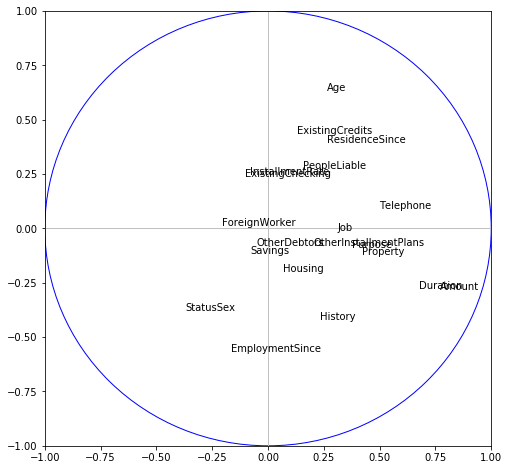

In [481]:
#cercle des corrélations 

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#variables actives
for j in range(p):
 plt.annotate(germanACP.columns[j],(corvar[j,0],corvar[j,1]))
#on change d'axe à chaque fois 
#les var sont bien representées dan le 1 er plan
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [482]:
germanACP.corr()

,ExistingChecking,History,Purpose,Savings,EmploymentSince,StatusSex,OtherDebtors,Property,OtherInstallmentPlans,Housing,Job,Telephone,ForeignWorker,Amount,Duration,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable
ExistingChecking,1.000000,-0.131100,-0.079508,0.038927,-0.074184,-0.028672,-0.101713,0.019656,-0.023378,-0.121346,-0.021350,0.049715,-0.017726,-0.063432,-0.084226,-0.031215,-0.075162,0.057936,0.042741,-0.027212
History,-0.131100,1.000000,0.143938,0.067464,0.078664,-0.005519,-0.008955,0.071606,0.239431,0.077417,0.037662,-0.018283,-0.041784,0.113776,0.142631,-0.024740,-0.027989,-0.070046,-0.207960,0.051849
Purpose,-0.079508,0.143938,1.000000,0.031698,0.026617,-0.035918,-0.020423,0.027161,0.049489,0.028464,0.155968,0.116031,0.035655,0.203234,0.105305,-0.092747,0.073651,0.066020,0.071995,0.077245
Savings,0.038927,0.067464,0.031698,1.000000,0.014129,0.058271,-0.006327,0.032131,0.002696,0.018343,-0.045329,-0.047016,0.006803,-0.060195,-0.009619,-0.010502,-0.007060,-0.068435,-0.003050,-0.015059
EmploymentSince,-0.074184,0.078664,0.026617,0.014129,1.000000,0.170340,0.009477,-0.041518,0.004556,0.059077,0.108195,-0.046683,0.031612,0.005653,-0.031987,-0.087305,-0.225763,-0.270485,-0.103222,-0.073919
StatusSex,-0.028672,-0.005519,-0.035918,0.058271,0.170340,1.000000,-0.011880,-0.099575,-0.065461,0.083146,-0.041234,-0.057207,0.009204,-0.159434,-0.116029,-0.081121,-0.106742,-0.186563,-0.089640,-0.238327
OtherDebtors,-0.101713,-0.008955,-0.020423,-0.006327,0.009477,-0.011880,1.000000,-0.101378,-0.000955,0.036219,-0.003580,-0.050996,0.107639,0.037921,0.006711,-0.014835,-0.012690,-0.028294,-0.017662,-0.010990
Property,0.019656,0.071606,0.027161,0.032131,-0.041518,-0.099575,-0.101378,1.000000,0.041147,0.022420,0.007785,0.155051,-0.138772,0.224550,0.245655,0.039353,0.055260,-0.054186,0.001209,-0.041111
OtherInstallmentPlans,-0.023378,0.239431,0.049489,0.002696,0.004556,-0.065461,-0.000955,0.041147,1.000000,-0.077624,0.060764,0.030704,-0.036734,0.045815,0.076992,0.034750,-0.034517,0.021858,0.046993,0.057595
Housing,-0.121346,0.077417,0.028464,0.018343,0.059077,0.083146,0.036219,0.022420,-0.077624,1.000000,0.022057,-0.003307,0.005155,0.056119,0.011950,-0.073955,0.255106,-0.108437,-0.052609,-0.015004


In [484]:
col_names = germanACP.corr().columns.values
#Vérification des corrélations  (>=0.6)
for col, row in (germanACP.corr().abs() >= 0.6).iteritems():
    print(col, col_names[row.values])

ExistingChecking ['ExistingChecking']
History ['History']
Purpose ['Purpose']
Savings ['Savings']
EmploymentSince ['EmploymentSince']
StatusSex ['StatusSex']
OtherDebtors ['OtherDebtors']
Property ['Property']
OtherInstallmentPlans ['OtherInstallmentPlans']
Housing ['Housing']
Job ['Job']
Telephone ['Telephone']
ForeignWorker ['ForeignWorker']
Amount ['Amount' 'Duration']
Duration ['Amount' 'Duration']
InstallmentRate ['InstallmentRate']
ResidenceSince ['ResidenceSince']
Age ['Age']
ExistingCredits ['ExistingCredits']
PeopleLiable ['PeopleLiable']


In [486]:
germanACP.drop(columns = ["Duration"],   inplace = True)

In [487]:
germanACP.head()

,ExistingChecking,History,Purpose,Savings,EmploymentSince,StatusSex,OtherDebtors,Property,OtherInstallmentPlans,Housing,Job,Telephone,ForeignWorker,Amount,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1169,4,4,67,2,1
1,1,1,0,1,1,1,0,0,0,0,0,0,0,5951,2,2,22,1,1
2,2,0,1,1,2,0,0,0,0,0,1,0,0,2096,2,3,49,1,2
3,0,1,2,1,2,0,1,1,0,1,0,0,0,7882,2,4,45,1,2
4,0,2,3,1,1,0,0,2,0,1,0,0,0,4870,3,4,53,2,2


## Clustering 

### K-MEANS

In [488]:
#data = final_data.drop(columns=['ExistingChecking','History','Purpose','Savings','EmploymentSince','StatusSex','OtherDebtors','Property','OtherInstallmentPlans','Housing','Job','Telephone','ForeignWorker','Class'])
data = germanACP
classification =np.array(final_data.Class)


In [489]:
data.head()

,ExistingChecking,History,Purpose,Savings,EmploymentSince,StatusSex,OtherDebtors,Property,OtherInstallmentPlans,Housing,Job,Telephone,ForeignWorker,Amount,InstallmentRate,ResidenceSince,Age,ExistingCredits,PeopleLiable
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1169,4,4,67,2,1
1,1,1,0,1,1,1,0,0,0,0,0,0,0,5951,2,2,22,1,1
2,2,0,1,1,2,0,0,0,0,0,1,0,0,2096,2,3,49,1,2
3,0,1,2,1,2,0,1,1,0,1,0,0,0,7882,2,4,45,1,2
4,0,2,3,1,1,0,0,2,0,1,0,0,0,4870,3,4,53,2,2


In [490]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

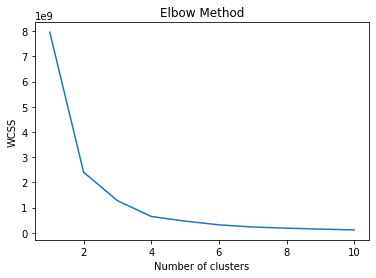

In [491]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [492]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", max_iter = 2000, n_init = 10, random_state = 0)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [493]:
pd.crosstab(classification, kmeans.labels_)

col_0,0,1
row_0,,
0,72,228
1,101,599


### DBSCAN 

In [495]:
germanACPDBS=germanACP
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [496]:
m = DBSCAN().fit(germanACPDBS)

In [498]:
pd.crosstab(classification,m.labels_)

col_0,-1
row_0,
0,300
1,700


### CAH 

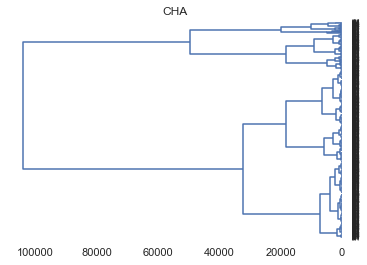

In [499]:

germanACPCAH=germanACP
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
Z = linkage(germanACPCAH,method='ward',metric='euclidean')
plt.title("CHA") 
dendrogram(Z,orientation='left',color_threshold=0) 
plt.show()

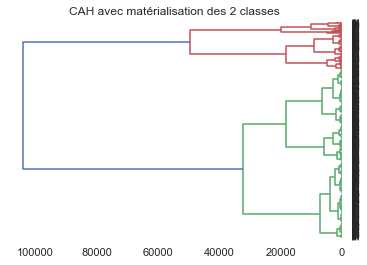

[1 2 1 2 2 2 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2
 1 1 1 1 1 2 2 2 1 1 1 2 1 1 2 1 1 1 1 2 2 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 2
 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 1 1
 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 2 2
 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2
 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 

In [503]:
# matérialisation des deux classes 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,orientation='left',color_threshold=60000) 
plt.show()

#découpage à la hauteur t ==> identifiants de 2 groupes obtenus 
groupes_cah = fcluster(Z,t=60000,criterion='distance') 
print(groupes_cah)

#index triés des groupes 
import numpy as np 
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(germanACPCAH.index[idg],groupes_cah[idg])) ; 



#### => on ne peut pas choisir le meilleur algorithme car on ne trouve pas celui qui distingue vraiment les 2 types de clients et donc on ne peut pas distinguer les caracteristiques de chaque type

In [504]:
pd.crosstab(classification,groupes_cah)

col_0,1,2
row_0,,
0,209,91
1,570,130


### Classification 

In [506]:
X = germanACP.values
y = classification

In [508]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [509]:
# Centrage et réduction
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [510]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erreur')

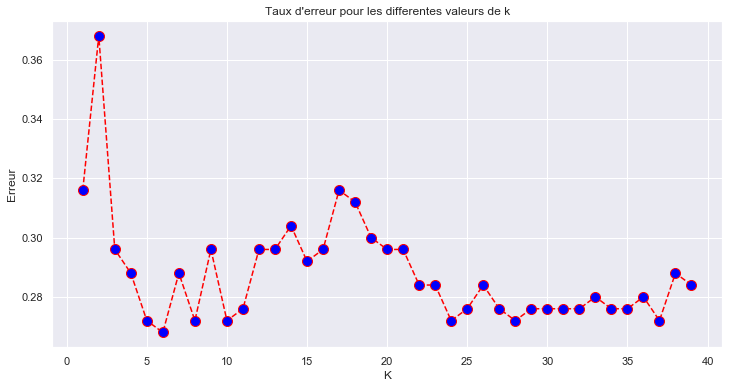

In [511]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [512]:
knn = KNeighborsClassifier(6)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [513]:
print(len(y_pred_knn))

250


In [514]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[ 38  36]
 [ 31 145]]


In [515]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.73


In [516]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53        74
           1       0.80      0.82      0.81       176

    accuracy                           0.73       250
   macro avg       0.68      0.67      0.67       250
weighted avg       0.73      0.73      0.73       250



### CART 

In [520]:
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.65


In [521]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[ 28  46]
 [ 41 135]]


### Random Forest 

In [522]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

C:\Users\chaym\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [523]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[ 26  48]
 [ 33 143]]


In [524]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.44      0.35      0.39        74
           1       0.75      0.81      0.78       176

    accuracy                           0.68       250
   macro avg       0.59      0.58      0.59       250
weighted avg       0.66      0.68      0.66       250



### Courbe ROC 

In [525]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

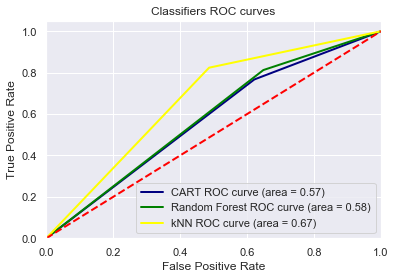

In [526]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

### => KNN a donné les meilleurs résultats 

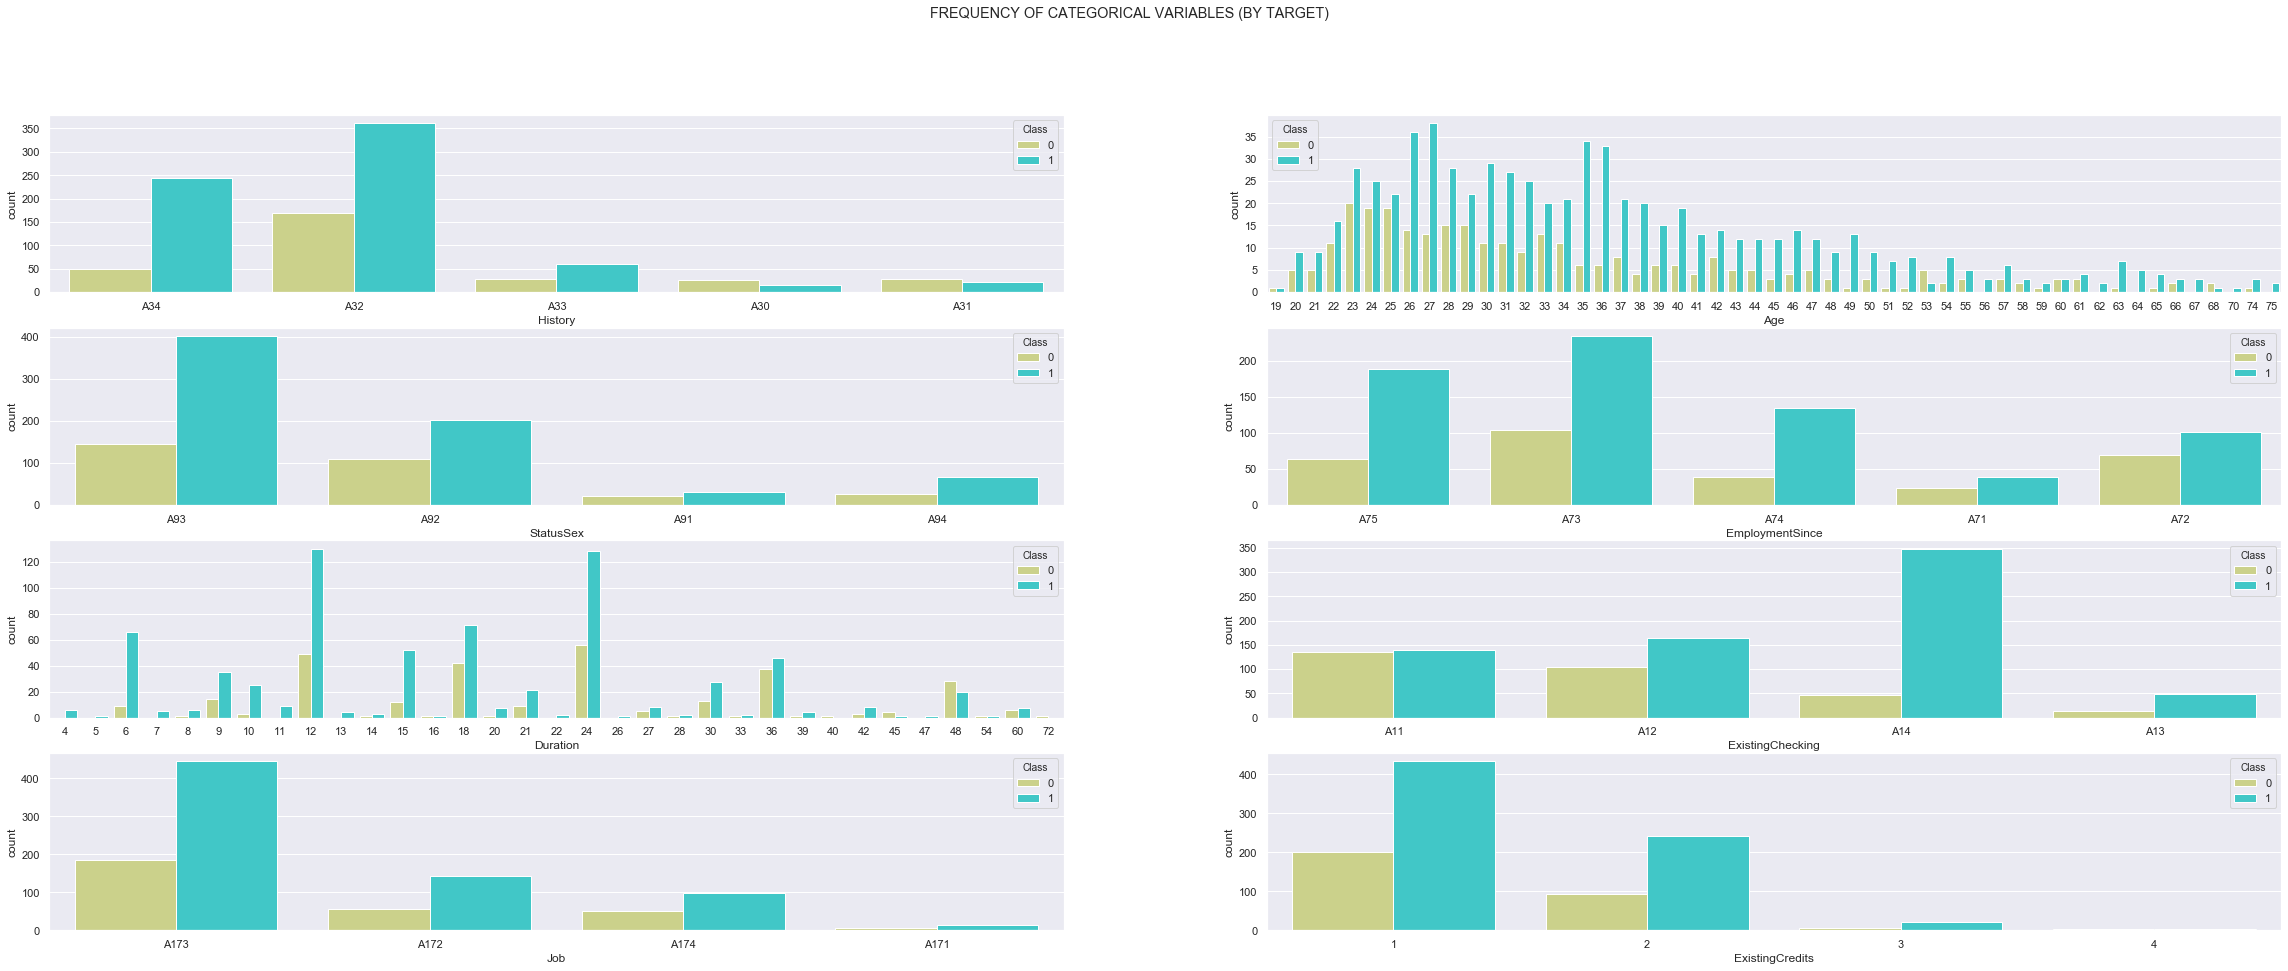

In [539]:

import seaborn as sns
subset = file[['Job','Purpose','Savings', 'Age', 'StatusSex','Amount','Class', 'Duration','History','EmploymentSince','ExistingChecking','ExistingCredits']]

f, axes = plt.subplots(4, 2, figsize=(40, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="History", hue="Class", data=subset, palette="rainbow_r", ax=axes[0,0])
ax2 = sns.countplot(x="Age", hue="Class", data=subset, palette="rainbow_r",ax=axes[0,1])
ax3 = sns.countplot(x="StatusSex", hue="Class", data=subset, palette="rainbow_r",ax=axes[1,0])
ax4 = sns.countplot(x="EmploymentSince", hue="Class", data=subset, palette="rainbow_r", ax=axes[1,1])
ax5 = sns.countplot(x="Duration", hue="Class", data=subset, palette="rainbow_r", ax=axes[2,0])
ax6 = sns.countplot(x="ExistingChecking", hue="Class", data=subset, palette="rainbow_r", ax=axes[2,1])
ax7 = sns.countplot(x="Job", hue="Class", data=subset, palette="rainbow_r", ax=axes[3,0])
ax8 = sns.countplot(x="ExistingCredits", hue="Class", data=subset, palette="rainbow_r", ax=axes[3,1])


In [533]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=file)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

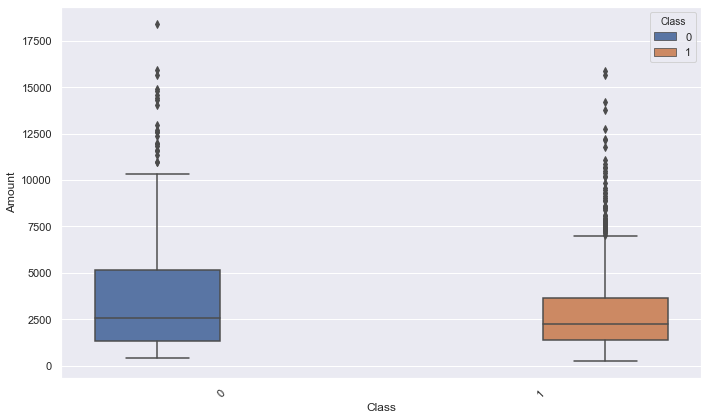

In [534]:
boxes("Class","Amount","Class")

In [1]:
import numpy as np
import plotly.graph_objs as go

In [2]:
x= file[['Job']]
y= file[['Class']]

NameError: name 'file' is not defined

In [8]:
import dash
import dash_core_components as dcc
import plotly.graph_objs as go

ap = dash.Dash()
fig = go.Figure(data=[go.Scatter(x=[1, 2, 3], y=[4, 1, 2])])
dcc.Graph(
        id='example-graph-2',
        figure=fig
    )

Graph(id='example-graph-2', figure=Figure({
    'data': [{'type': 'scatter', 'x': [1, 2, 3], 'y': [4, 1, 2]}], 'layout': {'template': '...'}
}))

In [ ]:
ap.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
